# Check if tracer has saturated the domain and how other species are changing with time

In [1]:
import os
import pandas as pd
import numpy as np

#Developed libraries for working with simulation results
import plots.saturated_steady_state as sssp
import analyses.transient as translys
from data_reader import data_processing as proc

#Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib as mpl

## Parent directories

In [2]:
results_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
#output_dir = "Y:/Home\khurana/4. Publications/Paper3/Figurecodes"
raw_dir = "E:/Richards_flow/Richards_flow_tr"#"X:/Richards_flow_big_sat"

In [4]:
Regimes = ["Fast", "Medium","Slow"]
trialist = proc.masterscenarios("Unsaturated")
mTrial = list(trialist.keys())
droplist = []
Trial = list(t for t in mTrial if t not in droplist)

# Tracer concentration profile: Concentration profiles-1D

- Plot tracer concentration 
- Plot tracer profiles at outlet for all scenarios with time

In [5]:
species = proc.speciesdict("Unsaturated")
gvarnames = ["Tracer_study"]
print(species["Tracer_study"]["TecIndex"])

5


### Final outputs to display flow wise and variance wise tracer concentration profile at outlet with time

In [10]:
Regimes = ["Fast", "Medium","Slow"]
varlist = [0,1,2,3]
Varcol = {0.1:'g',1 :'orange',5:'g',10:'steelblue'}
Anlin = {2 :':', 5:'-.', 10:'--'}
Ancol = {2:'g',5 :'orange',10:'steelblue'}
days_slow = list(range(151))
days_medium = list(np.arange(0,30.1,0.1))
days_fast = list(np.arange(0,2.01,0.01))
#Construct legend handles
solid = mlines.Line2D([], [], linestyle = 'solid', marker = None, color = "grey", markeredgecolor = "grey",markersize=10, label='Homogeneous')
dot = mlines.Line2D([], [], linestyle = ':', marker = None, color = "g", markeredgecolor = "g", markersize=10, label='2')
dashdot = mlines.Line2D([], [], linestyle = '-.', marker = None, color = "orange", markeredgecolor = "orange",markersize=10, label='5')
dashed = mlines.Line2D([], [], linestyle = '--', marker = None, color = "steelblue", markeredgecolor = "steelblue",markersize=10, label='10')
legend_handles = [solid, dot, dashdot, dashed]
legendkw = {'fontsize' : 14, 'title_fontsize' : 14}
labelkw = {'labelsize' : 14}
secondlabelkw = {'labelsize' : 16}
suptitlekw = {'fontsize' : 18}
titlekw = {'fontsize' : 16}
mpl.rc('font',family='Arial')

<ipython-input-11-bb457d26dbc5>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad = 0.01)


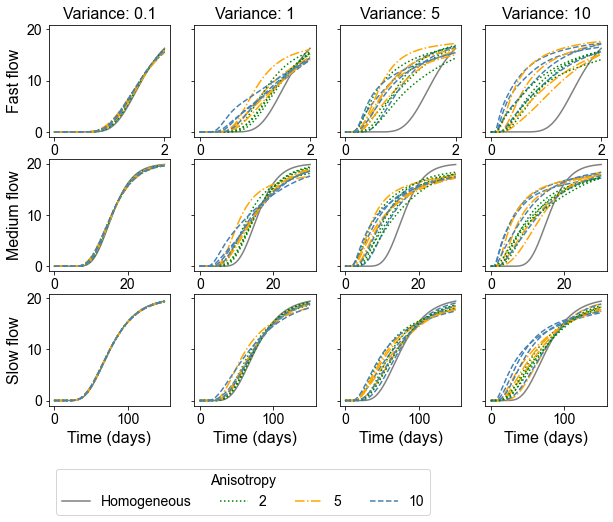

In [11]:
figbig, axes = plt.subplots(len(Regimes),4, figsize=(10, 7), sharey = True)
for v,i in zip(list(Varcol.keys()), varlist):
    Trial = list(t for t in trialist if trialist[t]["Het"]==v and t not in droplist)
    for r,xindex in zip(Regimes, [days_fast, days_medium, days_slow]):
        ridx = Regimes.index(r)*len(varlist) + i
        host = axes.flat[ridx]
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,-1,0,-1,113, gvarnames,"Unsaturated")
        host.plot(xindex, conctimeh[:, -6, 0],label=gvarnames[0],color='grey',linestyle="solid")
        for t in Trial:
            file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
            data = np.load(file)
            conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,-1,0,-1,113, gvarnames,"Unsaturated")
            host.plot(xindex, conctime[:, -6, 0],label=gvarnames[0],color=Ancol[trialist[t]["Anis"]],linestyle=Anlin[trialist[t]["Anis"]])
        host.tick_params(**labelkw)
for ax,v in zip(axes[0,:], list(Varcol.keys())):
    ax.set_title ("Variance: " + str(v), **titlekw)
for ax in axes[-1,:]:
    ax.set_xlabel ("Time (days)", **titlekw)
for ax,r in zip(axes[:,0], Regimes):
    ax.set_ylabel(r + " flow", **titlekw)
plt.legend(handles = legend_handles, bbox_to_anchor = (-0.4,-0.5), title = "Anisotropy", ncol = 4, **legendkw)
picname = os.path.join(results_dir, "tracer_profile_outlet.png")
plt.savefig(picname, dpi = 300, bbox_inches = 'tight', pad = 0.01)

### Tracer concentration profile in the domain at a select time point

In [ ]:
yindex = list(np.arange(0,5.1,0.05))
figbig, axes = plt.subplots(3,3, figsize=(13, 10), sharey = True, sharex = True)
for t in Trial:
    for r in ["Fast"]:
        fileh = os.path.join(raw_dir, r + "AR_0/" + r + "AR_0_RF-AH_df.npy")
        datah = np.load(fileh)
        i = Trial.index(t)
        host = axes.flat[i]
        file = os.path.join(raw_dir, r+"AR_0/"+ r + "AR_0_RF-A"+str(t)+"_df.npy")
        data = np.load(file)
        conctime, TotalFlow, Headinlettime = translys.conc_time (data,0,-1,0,-1,113, gvarnames,"Unsaturated")
        conctimeh, TotalFlowh, Headinlettimeh = translys.conc_time (datah,0,-1,0,-1,113, gvarnames,"Unsaturated")
        host.plot(conctimeh[-1, 6:-6, 0],yindex,label=gvarnames[0],color='grey',linestyle="-.")
        host.plot(conctime[-1, 6:-6, 0],yindex,label=gvarnames[0],color='k',linestyle="-")
        host.set_title(t)
        figbig.gca().invert_yaxis()